In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
df = pd.read_pickle('/dsa/groups/casestudy2022su/team05/carscom_v03.pkl')
df.head(30) #bring in pickled dataset

,Year,Make,Model,Dealer_Name,Distance Radius,Zip,State,City,Mileage,Price,...,Avg_Mileage,Min_Mileage,Max_Mileage,Count,price_diff,mileage_diff,YoY_price_pct_change,YoY_mileage_pct_change,Lat,Lon
0,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,30134,37990,...,29486.888889,4661,68184,90,-4506,14484,-11,96,32.716,-117.161
1,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,30134,37990,...,29486.888889,4661,68184,90,-4506,14484,-11,96,32.716,-117.161
2,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,4661,38990,...,29486.888889,4661,68184,90,-4506,14484,-11,96,32.716,-117.161
3,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,4661,38990,...,29486.888889,4661,68184,90,-4506,14484,-11,96,32.716,-117.161
4,2020,Jeep,Grand Cherokee Laredo,San Diego Chrysler Dodge Jeep RAM,50,92132,CA,San Diego,21909,31388,...,29486.888889,4661,68184,90,-4506,14484,-11,96,32.716,-117.161
5,2016,Dodge,Challenger SRT Hellcat,TRED Private Seller (San Diego),50,92132,CA,San Diego,29635,54099,...,43169.411765,6008,71456,51,-2857,20301,-5,88,32.716,-117.161
6,2016,Dodge,Challenger SRT Hellcat,Carvana-Touchless Delivery To Your Home,50,92132,CA,San Diego,62595,50990,...,43169.411765,6008,71456,51,-2857,20301,-5,88,32.716,-117.161
7,2010,Lexus,ES 350,TRED Private Seller (San Diego),50,92132,CA,San Diego,159000,8909,...,76505.054545,36016,216862,55,-9271,23697,-35,44,32.716,-117.161
8,2010,Lexus,ES 350,Carvana-Touchless Delivery To Your Home,50,92132,CA,San Diego,64663,18990,...,76505.054545,36016,216862,55,-9271,23697,-35,44,32.716,-117.161
9,2020,Buick,Encore Essence,Hertz Car Sales San Diego,50,92132,CA,San Diego,57751,21353,...,51223.333333,12868,70829,96,0,0,0,0,32.716,-117.161


In [49]:
# no electronic dealers and only STL data
stl_df = df[(df['electronic_dealer'] != 1) & (df['State']=='MO') & (df['City']=='St Louis')]
stl_df.shape 

(7528, 27)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89e50efbe0>]],
      dtype=object)

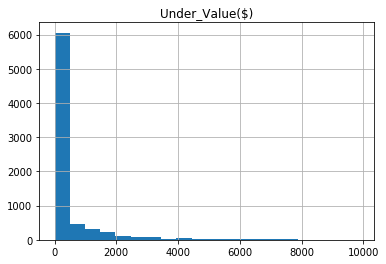

In [50]:
stl_df.hist(column=['Under_Value($)'], bins=20)

In [51]:
#want sum of under_value column and sort descending order for each STL dealer
dealer = stl_df.groupby(['Dealer_Name'])['Under_Value($)'].sum()
deal_df = dealer.sort_values(ascending = False).to_frame()
deal_df
#count of dealer cars for STL dealer
dealers = stl_df.groupby(['Dealer_Name'])['Count'].count()
deal_cnt_df = dealers.sort_values(ascending = False).to_frame()
deal_cnt_df

,Count
Dealer_Name,
Mungenast St. Louis Honda,386
Dave Sinclair Ford,239
Sapaugh GM Country,224
Dean Team Volkswagen Subaru of Ballwin,204
Auffenberg Auto Mall,186
...,...
Honda of Frontenac,2
Bo Beuckman Ford,2
West County Honda,1


In [52]:
STL_dealers = deal_df.merge(deal_cnt_df,how='inner',on='Dealer_Name').reset_index()

# need under value avg per STL dealer
STL_dealers['under_value_avg_per_dealer']=STL_dealers['Under_Value($)']/STL_dealers['Count']
print(STL_dealers.shape)
# want only STL dealers with more than 10 cars listed
STL_dealers=STL_dealers[(STL_dealers['Count']>10) & (STL_dealers['Dealer_Name'] != 'n/a')  ]
print(STL_dealers.shape)
STL_dealers = STL_dealers.sort_values(by=['under_value_avg_per_dealer'],ascending = False)
STL_dealers.head(20)

(135, 4)
(105, 4)


,Dealer_Name,Under_Value($),Count,under_value_avg_per_dealer
2,Napleton's Mid Rivers Chrysler Jeep Dodge RAM ...,118631,77,1540.662338
0,Glendale Chrysler Dodge Jeep RAM,127673,100,1276.730000
24,Napleton's Mid Rivers Kia,44728,38,1177.052632
29,Plaza Motor Company,35967,32,1123.968750
3,EchoPark Automotive St. Louis,108196,104,1040.346154
1,ALM St. Louis,122723,137,895.788321
26,Mercedes-Benz of St Louis,38352,43,891.906977
17,Bommarito Honda Superstore,53228,61,872.590164
43,Mercedes-Benz of Chesterfield,23984,28,856.571429
31,"Napleton Hyundai, Genesis of Hazelwood",33596,41,819.414634


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f899e42be48>]],
      dtype=object)

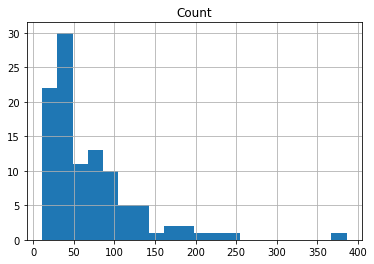

In [53]:
STL_dealers.hist(column=['Count'], bins=20)

In [54]:
#setting value classes, making more broad than just binary classifier.
conditions = [stl_df['Under_Value($)'] == 0
                ,((stl_df['Under_Value($)']>0) & (stl_df['Under_Value($)']<1000))
                ,((stl_df['Under_Value($)']>=1000) & (stl_df['Under_Value($)']<2000))
                ,((stl_df['Under_Value($)']>=2000) )
             ]
values = [0,1,2,3]

stl_df['value_class']=np.select(conditions,values)
#df['GRT_CHANGE']=df['GRT Change']
stl_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Make,Model,Dealer_Name,Distance Radius,Zip,State,City,Mileage,Price,...,Min_Mileage,Max_Mileage,Count,price_diff,mileage_diff,YoY_price_pct_change,YoY_mileage_pct_change,Lat,Lon,value_class
76740,2020,Jeep,Grand Cherokee Laredo,Napleton Off Lease,30,63101,MO,St Louis,19708,35190,...,4661,68184,90,-4506,14484,-11,96,38.627,-90.199,3
76741,2020,Jeep,Grand Cherokee Laredo,Mungenast St. Louis Honda,30,63101,MO,St Louis,60930,35999,...,4661,68184,90,-4506,14484,-11,96,38.627,-90.199,1
76743,2020,Jeep,Grand Cherokee Laredo,South County Dodge Chrysler Jeep RAM,30,63101,MO,St Louis,20859,37500,...,4661,68184,90,-4506,14484,-11,96,38.627,-90.199,3
76744,2020,Jeep,Grand Cherokee Laredo,Jack Schmitt Chevrolet Wood River,30,63101,MO,St Louis,12508,38964,...,4661,68184,90,-4506,14484,-11,96,38.627,-90.199,2
76745,2020,Jeep,Grand Cherokee Laredo,Marty Cancila Dodge Chrysler Jeep Ram of Flori...,30,63101,MO,St Louis,21727,37232,...,4661,68184,90,-4506,14484,-11,96,38.627,-90.199,3


In [55]:
#down sample preparation.
va_0 = stl_df[(stl_df['value_class'] == 0)  ] # 0 dollars under value
va_1  = stl_df[(stl_df['value_class'] == 1) ] 
va_2  = stl_df[(stl_df['value_class'] == 2) ] 
va_3  = stl_df[(stl_df['value_class'] == 3) ] 
print(va_0.shape)
print(va_1.shape)
print(va_2.shape)
print(va_3.shape)


(5594, 28)
(939, 28)
(537, 28)
(458, 28)


In [56]:
# down sample to meet lowest sample's class
from sklearn.utils import resample
X_downsample_1 = resample(va_0,
             replace=True,
             n_samples=len(va_3),
             random_state=42)

X_downsample_2 = resample(va_1,
             replace=True,
             n_samples=len(va_3),
             random_state=42)

X_downsample_3 = resample(va_2,
             replace=True,
             n_samples=len(va_3),
             random_state=42)


print(X_downsample_1.shape)
print(X_downsample_2.shape)
print(X_downsample_3.shape)

# concatenate downsampled frames.

data_downsampled_mod = pd.concat([X_downsample_1,X_downsample_2,X_downsample_3,va_3])
print(data_downsampled_mod.shape)

(458, 28)
(458, 28)
(458, 28)
(1832, 28)


In [57]:
# ML staging. y and X data.
y = data_downsampled_mod['value_class'].values
Xs=data_downsampled_mod.drop(columns=['value_class','Distance Radius','Rate','miles','Avg_Price','Min_Price','Max_Price'
                                      ,'Avg_Mileage','Min_Mileage','electronic_dealer'
                                     ,'Max_Mileage','Count','YoY_price_pct_change','YoY_mileage_pct_change',
                                     'Lat','Lon','Under_Value($)','Zip','State','City','price_diff','mileage_diff'])  
#y=y.astype('category').cat.codes
feats = Xs.columns
Xs.head()

,Year,Make,Model,Dealer_Name,Mileage,Price
78023,2019,Ford,Escape SEL,Weiss Toyota of South County,59213,26500
84871,2011,Ford,F-150 SVT Raptor,Mattern Automotive,291000,17990
84601,2018,Ford,Expedition Max Limited,South County Dodge Chrysler Jeep RAM,61470,50000
84550,2021,Volkswagen,Jetta 1.4T SEL,Bommarito Volkswagen Hazelwood,21573,28995
82457,2020,Ford,Explorer Limited,Dave Sinclair Ford,22146,42995


In [58]:
# categorical codes for non numerical data
Xs['Make']=Xs['Make'].astype('category').cat.codes
Xs['Model']=Xs['Model'].astype('category').cat.codes
Xs['Dealer_Name']=Xs['Dealer_Name'].astype('category').cat.codes
#Xs['State']=Xs['State'].astype('category').cat.codes
#Xs['City']=Xs['City'].astype('category').cat.codes

Xs.head()


,Year,Make,Model,Dealer_Name,Mileage,Price
78023,2019,11,203,116,59213,26500
84871,2011,11,220,73,291000,17990
84601,2018,11,207,98,61470,50000
84550,2021,35,300,20,21573,28995
82457,2020,11,209,34,22146,42995


In [59]:
#!pip install hyperopt

In [60]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#from sklearn.metrics import plot_precision_recall_curve, roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.metrics import accuracy_score,roc_auc_score, precision_recall_curve, average_precision_score, f1_score, auc,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [61]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

In [62]:
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}


In [63]:
def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, X_train, y_train).mean()
    return {"loss": -acc, "status": STATUS_OK}


In [64]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)

print("Best: {}".format(best))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



  5%|▌         | 1/20 [00:01<00:21,  1.16s/trial, best loss: -0.47991454907090964]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 10%|█         | 2/20 [00:02<00:23,  1.29s/trial, best loss: -0.5120089864823204] 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 15%|█▌        | 3/20 [00:03<00:20,  1.22s/trial, best loss: -0.5120089864823204]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 20%|██        | 4/20 [00:04<00:17,  1.12s/trial, best loss: -0.5120089864823204]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 25%|██▌       | 5/20 [00:06<00:17,  1.20s/trial, best loss: -0.5290576954354668]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 30%|███       | 6/20 [00:07<00:16,  1.14s/trial, best loss: -0.5290576954354668]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 35%|███▌      | 7/20 [00:07<00:13,  1.03s/trial, best loss: -0.5290576954354668]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 40%|████      | 8/20 [00:09<00:13,  1.10s/trial, best loss: -0.5317508234832219]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 45%|████▌     | 9/20 [00:10<00:14,  1.31s/trial, best loss: -0.5324254966446677]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 50%|█████     | 10/20 [00:11<00:11,  1.19s/trial, best loss: -0.5324254966446677]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 55%|█████▌    | 11/20 [00:13<00:12,  1.37s/trial, best loss: -0.5324254966446677]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 60%|██████    | 12/20 [00:14<00:10,  1.33s/trial, best loss: -0.5433321774770147]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 65%|██████▌   | 13/20 [00:16<00:09,  1.31s/trial, best loss: -0.5433321774770147]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 70%|███████   | 14/20 [00:17<00:07,  1.18s/trial, best loss: -0.5433321774770147]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 75%|███████▌  | 15/20 [00:17<00:05,  1.08s/trial, best loss: -0.5433321774770147]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 80%|████████  | 16/20 [00:19<00:04,  1.12s/trial, best loss: -0.5433321774770147]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 85%|████████▌ | 17/20 [00:19<00:03,  1.02s/trial, best loss: -0.5433321774770147]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 90%|█████████ | 18/20 [00:20<00:01,  1.04trial/s, best loss: -0.5433321774770147]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



 95%|█████████▌| 19/20 [00:21<00:00,  1.03trial/s, best loss: -0.5433321774770147]

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



100%|██████████| 20/20 [00:22<00:00,  1.06trial/s, best loss: -0.5433321774770147]
Best: {'criterion': 1, 'max_depth': 14.0, 'n_estimators': 1}


In [65]:
# grid space
grid = {'random_state': [58],
        'n_estimators': [100,300],
        'max_features': ['sqrt'],
        'criterion': ['gini'],
        'max_depth': [7,10],
        'min_samples_leaf': [2,3],
        'bootstrap': [True],
        'class_weight': [
            {0: 1, 1: 2}, {0: 1, 1: 2}, {0: 1, 1: 2}
        ],
       }

In [66]:
#cross validate data staging
cross_val = GridSearchCV(
            estimator=RandomForestClassifier(),
            param_grid=grid,
            cv=10,
            verbose=1,
            n_jobs=-1,
            #scoring="average_precision"
)
cross_val.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   29.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'random_state': [58], 'n_estimators': [100, 300], 'max_features': ['sqrt'], 'criterion': ['gini'], 'max_depth': [7, 10], 'min_samples_leaf': [2, 3], 'bootstrap': [True], 'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 2}, {0: 1, 1: 2}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [67]:
#best estimator put as model
one_model = cross_val.best_estimator_
#predict data
y_pred = one_model.predict(X_test)


In [68]:
#best parameters for model
cross_val.best_params_

{'bootstrap': True,
 'class_weight': {0: 1, 1: 2},
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 100,
 'random_state': 58}

In [72]:
# confusion matrix for multi class model

conf_mat = pd.DataFrame(confusion_matrix(
        y_test, y_pred,labels=[0,1,2,3]),
        index=['true:$0 ', 'true:$1-$999','true:$1000-$1999','true:$2000-up'], 
        columns=['pred:$0 ', 'pred:$1-$999','pred:$1000-$1999','pred:$2000-up'])

print("Confusion Matrix for Deal Rating Classes")
print(accuracy_score(y_test,y_pred))
#print('Pred: Prime, TA, TF')
print(conf_mat)
#print('Rejects: Prime, TA')
print("total rows test data: ", y_test.shape)

Confusion Matrix for Deal Rating Classes
0.4986376021798365
                  pred:$0   pred:$1-$999  pred:$1000-$1999  pred:$2000-up
true:$0                 30            39                 5             17
true:$1-$999            14            57                 6             10
true:$1000-$1999         3            23                44             20
true:$2000-up            9            25                13             52
total rows test data:  (367,)


In [70]:
importances = one_model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

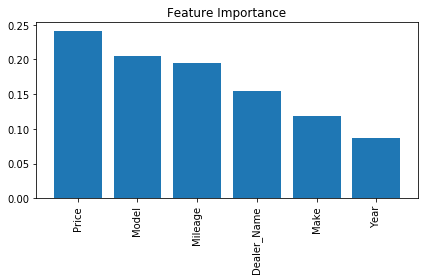

In [71]:
# feature importance plot
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()